In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
df = pd.read_csv('BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
...,...,...,...,...,...,...,...
3465,2024-03-14,73079.375000,73750.070313,68563.023438,71396.593750,71396.593750,59594605698
3466,2024-03-15,71387.875000,72357.132813,65630.695313,69403.773438,69403.773438,78320453976
3467,2024-03-16,69392.484375,70046.273438,64801.394531,65315.117188,65315.117188,46842198371
3468,2024-03-17,65316.343750,68845.718750,64545.316406,68390.625000,68390.625000,44716864318


In [ ]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2014-09-18,424.440002
1,2014-09-19,394.795990
2,2014-09-20,408.903992
3,2014-09-21,398.821014
4,2014-09-22,402.152008
...,...,...
3465,2024-03-14,71396.593750
3466,2024-03-15,69403.773438
3467,2024-03-16,65315.117188
3468,2024-03-17,68390.625000


In [ ]:
df['Date']

0       2014-09-18
1       2014-09-19
2       2014-09-20
3       2014-09-21
4       2014-09-22
           ...    
3465    2024-03-14
3466    2024-03-15
3467    2024-03-16
3468    2024-03-17
3469    2024-03-18
Name: Date, Length: 3470, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,2014-09-18,424.440002
1,2014-09-19,394.795990
2,2014-09-20,408.903992
3,2014-09-21,398.821014
4,2014-09-22,402.152008
...,...,...
3465,2024-03-14,71396.593750
3466,2024-03-15,69403.773438
3467,2024-03-16,65315.117188
3468,2024-03-17,68390.625000


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-10-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2014-09-18
1      2014-09-19
2      2014-09-20
3      2014-09-21
4      2014-09-22
          ...    
3465   2024-03-14
3466   2024-03-15
3467   2024-03-16
3468   2024-03-17
3469   2024-03-18
Name: Date, Length: 3470, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
2014-09-22,402.152008
...,...
2024-03-14,71396.593750
2024-03-15,69403.773438
2024-03-16,65315.117188


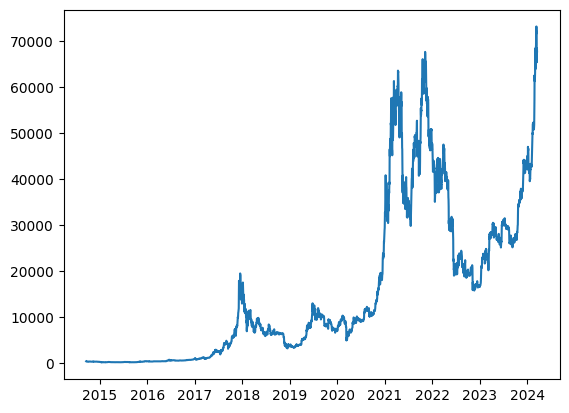

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2014-09-24',
                                '2024-03-17',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2014-09-24,398.821014,402.152008,435.790985,423.204987
1,2014-09-25,402.152008,435.790985,423.204987,411.574005
2,2014-09-26,435.790985,423.204987,411.574005,404.424988
3,2014-09-27,423.204987,411.574005,404.424988,399.519989
4,2014-09-28,411.574005,404.424988,399.519989,377.181000
...,...,...,...,...,...
3458,2024-03-13,69019.789063,72123.906250,71481.289063,73083.500000
3459,2024-03-14,72123.906250,71481.289063,73083.500000,71396.593750
3460,2024-03-15,71481.289063,73083.500000,71396.593750,69403.773438
3461,2024-03-16,73083.500000,71396.593750,69403.773438,65315.117188


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((3463,), (3463, 3, 1), (3463,))

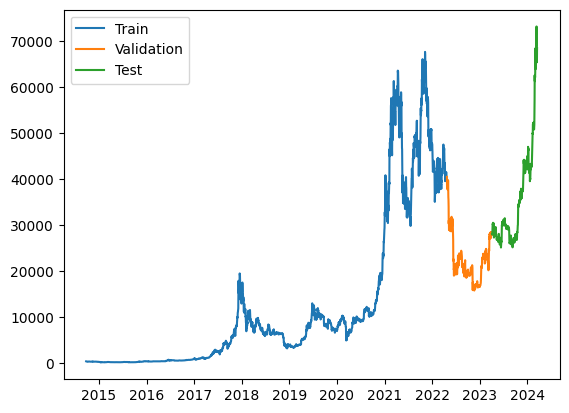

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras import layers

model = Sequential()

# Adding a SimpleRNN layer
model.add(layers.SimpleRNN(10, input_shape=(None, 1), activation="relu"))

# Adding a Dense output layer
model.add(layers.Dense(1))

# Compiling the model
model.compile(loss="mean_squared_error", optimizer="adam")

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)


Epoch 1/200
87/87 [==============================] - 1s 6ms/step - loss: 22686266.0000 - val_loss: 1181221.5000
Epoch 2/200
87/87 [==============================] - 0s 4ms/step - loss: 818594.6875 - val_loss: 1081830.8750
Epoch 3/200
87/87 [==============================] - 0s 4ms/step - loss: 762784.6250 - val_loss: 1069706.8750
Epoch 4/200
87/87 [==============================] - 0s 4ms/step - loss: 731729.7500 - val_loss: 1066750.7500
Epoch 5/200
87/87 [==============================] - 0s 4ms/step - loss: 724145.7500 - val_loss: 1001458.3750
Epoch 6/200
87/87 [==============================] - 0s 4ms/step - loss: 708731.1250 - val_loss: 1001838.5000
Epoch 7/200
87/87 [==============================] - 0s 4ms/step - loss: 707057.1250 - val_loss: 1003130.1250
Epoch 8/200
87/87 [==============================] - 0s 3ms/step - loss: 695639.3125 - val_loss: 1043587.6875
Epoch 9/200
87/87 [==============================] - 0s 4ms/step - loss: 691372.6250 - val_loss: 1009348.6250
Epoch 10

In [ ]:
# print(X_train)
# model = build_rnn_model(
#     X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss, optimizer=optimizer)
# history = model.fit(
#     X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=batch_size, verbose=1, shuffle=True)

[[[  398.821]
  [  402.152]
  [  435.791]]

 [[  402.152]
  [  435.791]
  [  423.205]]

 [[  435.791]
  [  423.205]
  [  411.574]]

 ...

 [[41502.75 ]
  [41374.38 ]
  [40527.363]]

 [[41374.38 ]
  [40527.363]
  [39740.32 ]]

 [[40527.363]
  [39740.32 ]
  [39486.73 ]]]
Epoch 1/100
174/174 [==============================] - 11s 21ms/step - loss: 419733280.0000 - val_loss: 1362548608.0000
Epoch 2/100
174/174 [==============================] - 1s 7ms/step - loss: 419733152.0000 - val_loss: 1362548608.0000
Epoch 3/100
174/174 [==============================] - 1s 7ms/step - loss: 419733280.0000 - val_loss: 1362548608.0000
Epoch 4/100
174/174 [==============================] - 2s 10ms/step - loss: 419733376.0000 - val_loss: 1362548608.0000
Epoch 5/100
174/174 [==============================] - 2s 9ms/step - loss: 419733152.0000 - val_loss: 1362548608.0000
Epoch 6/100
174/174 [==============================] - 1s 7ms/step - loss: 419733088.0000 - val_loss: 1362548608.0000
Epoch 7/100
174/174

KeyboardInterrupt: 

In [ ]:
# history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

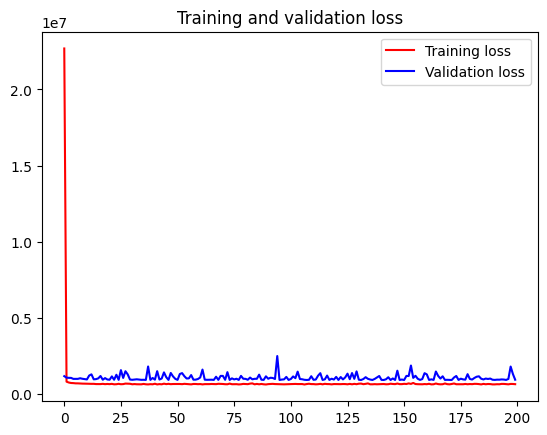

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

11/11 [==============================] - 0s 2ms/step


((2770, 1), (347, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1,1))
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  53251080.102916524
Train data MSE:  2835677500000000.0
Train data MAE:  22958778.0
-------------------------------------------------------------------------------------
Test data RMSE:  65561934.83634918
Test data MSE:  4298367300000000.0
Test data MAE:  39735784.0


In [ ]:
print("Train data explained variance regression score:",explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.997725784778595
Test data explained variance regression score: 0.9917710423469543


11/11 [==============================] - 0s 3ms/step


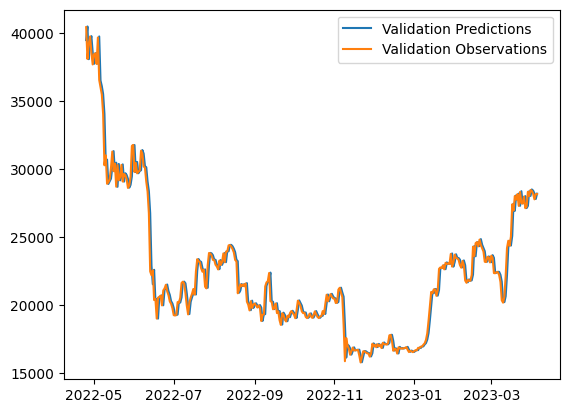

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

11/11 [==============================] - 0s 3ms/step


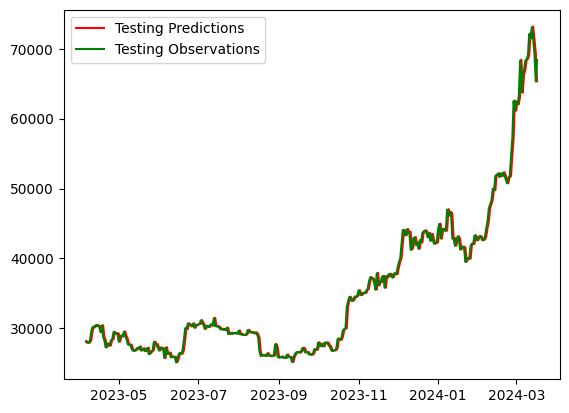

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions,color="red")
plt.plot(dates_test, y_test,color="green")
plt.legend(['Testing Predictions', 'Testing Observations'])

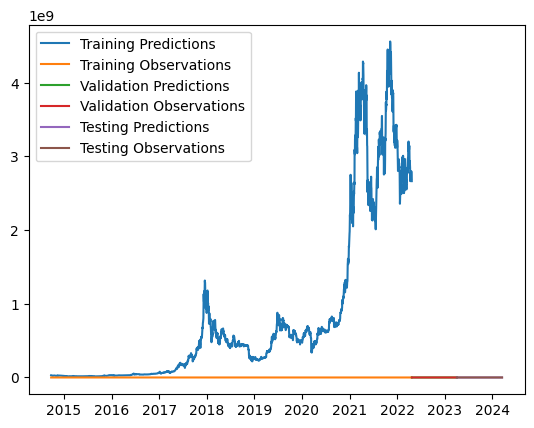

In [ ]:
plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])